In [1]:
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def load_point_clouds(filename, index):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
        point_cloud, label = data[index]
        return point_cloud, label

def visualize_point_cloud(point_cloud):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2])
    
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    plt.show()

In [3]:
filename = 'shapes_data.pkl'
index = 0  # Change this to load a different point cloud

point_cloud, label = load_point_clouds(filename, index)

In [4]:
import gudhi as gd
import persim
import numpy as np
import pickle

In [5]:
def compute_persistence_diagram(point_cloud):
    rips_complex = gd.RipsComplex(points=point_cloud)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence()
    return diag

# def compute_persistence_image(diagram, pixel_size=20):
#     pim = persim.PersistenceImager(pixel_size=pixel_size)
#     pim.fit([diagram])  # Fit the imager on a single diagram
#     img = pim.transform(diagram)
#     return img

# def load_point_clouds(filename):
#     with open(filename, 'rb') as file:
#         data = pickle.load(file)
#         return [pc for pc, _ in data]

In [6]:
diag0=compute_persistence_diagram(point_cloud)

In [7]:
import matplotlib.pyplot as plt
max_birth_death_time=2

def plot_persistence_diagram(diagram):
    for interval in diagram:
        if interval[0] == 1:  # Change this to plot other homology dimensions
            birth, death = interval[1]
            if death == float('inf'):  # Handle infinite death time
                death = max_birth_death_time  # Replace with a large number or the maximum of your diagram's birth/death times
            plt.plot(birth, death, "bo")
    
    plt.plot([0, max_birth_death_time], [0, max_birth_death_time], 'k--')  # Diagonal line
    plt.xlabel('Birth Time')
    plt.ylabel('Death Time')
    plt.title('Persistence Diagram')
    plt.show()


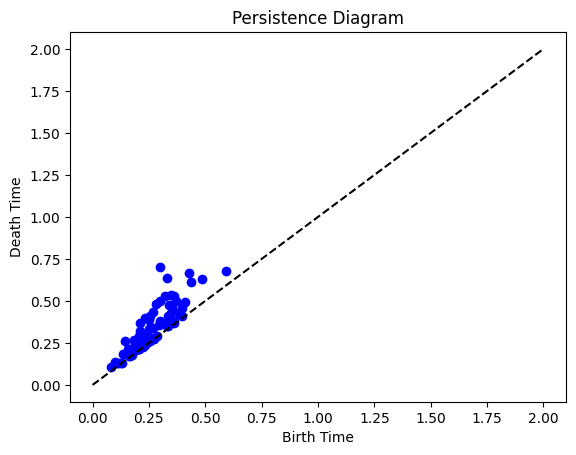

In [8]:
plot_persistence_diagram(diag0)


In [20]:
diag0

[(1, (0.2972606605909454, 0.7006171792412677)),
 (1, (0.32795598462515957, 0.6381355339513471)),
 (1, (0.42574818793671576, 0.6658821876161019)),
 (1, (0.3207472998602862, 0.5307330797339871)),
 (1, (0.2985315080531075, 0.5017152804591075)),
 (1, (0.2823782202869507, 0.479116088053687)),
 (1, (0.3499288112661528, 0.5380329912758102)),
 (1, (0.4348004441862601, 0.6106920534297754)),
 (1, (0.3615952049882363, 0.5310155863803311)),
 (1, (0.26902943337238344, 0.43310471172288284)),
 (1, (0.23400717418137468, 0.395995874417949)),
 (1, (0.20996309675688118, 0.370777013994403)),
 (1, (0.25450924353020343, 0.40787456683656137)),
 (1, (0.48389425780745376, 0.6288277017088685)),
 (1, (0.2509785807199781, 0.3877957757622071)),
 (1, (0.3397352618262088, 0.4733922654858994)),
 (1, (0.36868897159997266, 0.4966454007638259)),
 (1, (0.1450450733286972, 0.25887124564114966)),
 (1, (0.3531239877164488, 0.46285729567679623)),
 (1, (0.20981039327676457, 0.31951983669190426)),
 (1, (0.2051121294641916, 0.2

In [9]:
import numpy as np

def format_persistence_diagram(diag, homology_dim=1):
    # Filter out points based on homology dimension
    filtered_pairs = [pair for dim, pair in diag if dim == homology_dim]

    # Convert to a NumPy array
    formatted_diag = np.array(filtered_pairs)

    # Replace infinity values if necessary
    # Example: formatted_diag[formatted_diag == np.inf] = large_number

    return formatted_diag

def compute_persistence_image(diagram, pixel_size=20):
    pim = persim.PersistenceImager(pixel_size=pixel_size)
    pim.fit([diagram])  # Fit the imager on a single diagram
    img = pim.transform(diagram)
    return img

# Format the diagram before passing it to compute_persistence_image
formatted_diag0 = format_persistence_diagram(diag0, homology_dim=1)
pi0 = compute_persistence_image(formatted_diag0)


In [10]:
pi0=compute_persistence_image(diag0)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (375, 2) + inhomogeneous part.

## take2

In [11]:
import gtda
from gtda.homology import VietorisRipsPersistence
import numpy as np

# Example point clouds
#point_clouds_basic = [np.random.rand(100, 3) for _ in range(10)]  # Replace with your point clouds

# Initialize VietorisRipsPersistence
homology_dimensions = [0, 1, 2]
persistence = VietorisRipsPersistence(
    metric="euclidean",
    homology_dimensions=homology_dimensions,
    n_jobs=6,
    collapse_edges=True,
)
X=point_cloud
X=X.reshape(1, *X.shape)
# Compute the persistence diagrams
diagrams_basic = persistence.fit_transform(X)


In [12]:
diagrams_basic

array([[[0.        , 0.00436135, 0.        ],
        [0.        , 0.00545826, 0.        ],
        [0.        , 0.00612634, 0.        ],
        ...,
        [0.75257152, 0.75639582, 2.        ],
        [0.72963333, 1.64548123, 2.        ],
        [0.67992747, 0.68379635, 2.        ]]])

In [13]:
from gtda.plotting import plot_diagram

# Plot the persistence diagram for the first point cloud
plot_diagram(diagrams_basic[0])

Transforming persistence diagrams to persistence images

In [16]:
from gtda.diagrams import PersistenceImage
import numpy as np

# Example persistence diagrams
#persistence_diagrams = np.array([[[0., 0.004, 0.], [0., 0.005, 0.], ..., [0.73, 1.645, 2.], [0.679, 0.683, 2.]]])

# Initialize the PersistenceImage transformer
persistence_image = PersistenceImage(#pixel_size=0.2,  # Adjust pixel size as needed
                                     n_bins=50,       # Adjust number of bins as needed
                                     weight_function=lambda x: x[1])

# Transform the persistence diagrams to persistence images
persistence_images = persistence_image.fit_transform(diagrams_basic)

# The persistence_images array is now suitable for machine learning models


In [17]:
persistence_images

array([[[[9.65625963e+00, 9.54303947e+00, 9.21128200e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [1.05500487e+01, 1.04263488e+01, 1.00638837e+01, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [1.14942277e+01, 1.13594573e+01, 1.09645532e+01, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [3.15312720e+01, 3.11615661e+01, 3.00782548e+01, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [3.00907941e+01, 2.97379780e+01, 2.87041568e+01, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [2.86177960e+01, 2.82822508e+01, 2.72990370e+01, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[4.42762153e-02, 5.34809579e-02, 6.40758358e-02, ...,
          2.96933019e-02, 2.45519963e-02, 2.01831580e-02],
         [4.99240230e-02, 6.00826493e-02, 7.17402903e-02, ...,
          3.42093993e-02, 2.83733152e-02, 2.33979029e-02],
        

In [21]:
# Flatten the persistence images
flattened_images = persistence_images.reshape(persistence_images.shape[0], -1)


In [22]:
flattened_images

array([[9.65625963, 9.54303947, 9.211282  , ..., 0.63714525, 0.63435328,
        0.63145276]])